In [1]:

import numpy as np


In [2]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
print(red_wine.head())
print(red_wine.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split


rwine_train, rtest= train_test_split(red_wine, train_size = 0.6)
rwine_val, rwine_test = train_test_split(red_wine, train_size = 0.5)

print(rwine_train.head())
print(rwine_val.head())
print(rwine_test.head())


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
538            12.9             0.350         0.49             5.8      0.066   
763             9.3             0.655         0.26             2.0      0.096   
121             8.8             0.550         0.04             2.2      0.119   
1099            8.6             0.520         0.38             1.5      0.096   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
13                    9.0                  29.0  0.99740  3.26       1.56   
538                   5.0                  35.0  1.00140  3.20       0.66   
763                   5.0                  35.0  0.99738  3.25       0.42   
121                  14.0                  56.0  0.99620  3.21       0.60   
1099                  5.0                  18.0  0.99666  3.20       0.52   

      alcohol  quality  
13        9.1        5  


In [4]:



y_train = rwine_train.iloc[:,-1] 



X_train = rwine_train.iloc[:,:-1]
print(X_train.head)





<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              7.8             0.610         0.29             1.6      0.114   
538            12.9             0.350         0.49             5.8      0.066   
763             9.3             0.655         0.26             2.0      0.096   
121             8.8             0.550         0.04             2.2      0.119   
1099            8.6             0.520         0.38             1.5      0.096   
...             ...               ...          ...             ...        ...   
923             6.8             0.410         0.31             8.8      0.084   
574            10.6             0.340         0.49             3.2      0.078   
248             7.7             0.530         0.06             1.7      0.074   
581            12.3             0.500         0.49             2.2      0.089   
505            10.2             0.490         0.63             2.9      0.072  

In [5]:
class lreg:
    def __init__(self):
        self.beta = None


    def train(self, X, y):
        self.beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        return X.dot(self.beta)
    
    
r_wine = lreg()
r_wine.train(X_train, y_train)
r_wine.beta





array([-1.83963723e-02, -1.09924238e+00, -1.23675158e-01,  2.28397442e-02,
       -1.59529323e+00,  3.19263325e-03, -2.96450112e-03,  5.67772100e+00,
       -8.32280785e-01,  7.43817487e-01,  3.07012190e-01])

In [6]:
import math

y_pred = r_wine.predict(X_train)

def RMSE(y_true, y_pred):
    residues = y_true - y_pred
    return math.sqrt(residues @ residues.T / len(y_true))



print(f'train RMSE = {RMSE(y_train, y_pred)}')


y_test = rwine_test.iloc[:,-1] 

X_test = rwine_test.iloc[:,:-1]
y_testpred = r_wine.predict(X_test)
print(f'test RMSE = {RMSE(y_test, y_testpred)}')


train RMSE = 0.6439219784183737
test RMSE = 0.6709398546643942


In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [8]:



def stad(X):
    for i in range(X.shape[1]):
        X.iloc[:,i] = (X.iloc[:,i] - X.iloc[:,i].mean())/X.iloc[:,i].std()**2
    return X

train_scale = pd.DataFrame(scale.fit_transform(rwine_train),columns = rwine_train.columns)

train_scale = np.c_[np.ones((train_scale.shape[0], 1)), train_scale]
train_scale = pd.DataFrame(train_scale)

print(train_scale)


def concat(X):
    return np.concatenate([np.ones(shape=(len(X), 1)), X], axis=1)



class LMS:
    def __init__(self):
        self.w = np.random.uniform(low = -0.1, high = 0.1, size = 12)
    
    def lms(self, train, n_k=0.000001, num_iterations=100):
        for iteration in range(num_iterations):
            t_shuf = train.sample(frac = 1)          
            y = t_shuf.iloc[:,-1] 
            X = t_shuf.iloc[:,:-1]
            for i in range(X.shape[0]):
                pred = np.dot(X.iloc[i], self.w)
                error = y.iloc[i] - pred
                self.w += n_k * error * X.iloc[i]

        
    def predictL(self, X):
        return np.dot(X, self.w)


      0         1         2         3         4         5         6   \
0    1.0 -0.306559  0.458135  0.066938 -0.648454  0.564030 -0.662615   
1    1.0  2.509646 -1.031678  1.092400  2.089327 -0.472103 -1.039903   
2    1.0  0.521737  0.715988 -0.086881 -0.387713  0.175480 -1.039903   
3    1.0  0.245638  0.114332 -1.214888 -0.257342  0.671960 -0.191005   
4    1.0  0.135199 -0.057569  0.528396 -0.713639  0.175480 -1.039903   
..   ...       ...       ...       ...       ...       ...       ...   
954  1.0 -0.858756 -0.687875  0.169485  4.044885 -0.083553  0.940860   
955  1.0  1.239593 -1.088979  1.092400  0.394510 -0.213070  0.374928   
956  1.0 -0.361778 -0.000269 -1.112342 -0.583269 -0.299414 -0.662615   
957  1.0  2.178328 -0.172170  1.092400 -0.257342  0.024377 -1.039903   
958  1.0  1.018714 -0.229471  1.810223  0.198954 -0.342586 -0.568293   

           7         8         9         10        11        12  
0   -0.548420  0.303557 -0.320147  5.343845 -1.238927 -0.810023  
1  

In [9]:



LMS_r = LMS()
LMS_r.w
LMS_r.lms(train_scale)



In [10]:

X_train_scale = train_scale.iloc[:,:-1]
y_train_scale = train_scale.iloc[:,-1] 



y_LMSpred = LMS_r.predictL(X_train_scale)

print(f'train RMSE = {RMSE(y_train_scale, y_LMSpred)}')



train RMSE = 0.9475699670064375


In [11]:
test_scale = pd.DataFrame(scale.fit_transform(rwine_test),columns = rwine_test.columns)
test_scale = pd.DataFrame(test_scale)

In [12]:
X_test_scale = test_scale.iloc[:,:-1]
y_test_scale = test_scale.iloc[:,-1] 
X_test_scale = np.c_[np.ones((X_test_scale.shape[0], 1)), X_test_scale]
y_test_LMSpred = LMS_r.predictL(X_test_scale)

print(f'test RMSE = {RMSE(y_test_scale, y_test_LMSpred)}')

test RMSE = 0.9519536844976731


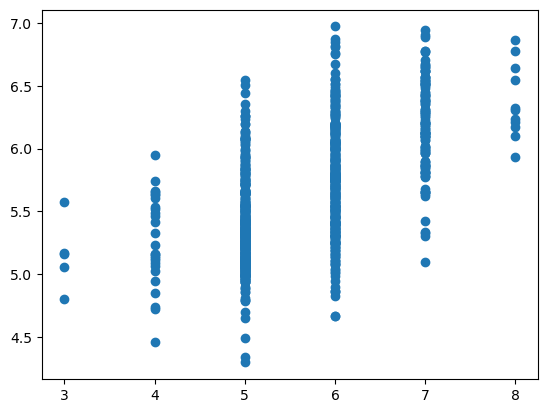

In [13]:
import matplotlib.pyplot as plt


plt.scatter(y_train, y_pred)
plt.show()